# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier
from random import sample
import pandas as pd

def train_AdaBoost(X, y, k):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
    
    N = X.shape[0]
    # D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    D = pd.concat([X, y], axis=1)
    
    # Initialize weights
    weight = np.ones(shape=(N,))/N

    for i in range(k):
        
        # Sample from the dataset according to weights 
        D1 = D.sample(N,replace=True,weights=weight,random_state=5)
        X = np.array(D1.iloc[:,:2])
        y = np.array(D1.iloc[:,2])
        X_all = np.array(D.iloc[:,:2])
        y_all = np.array(D.iloc[:,2])

        # Fit a decision stump 
        clf = DecisionTreeClassifier(max_depth=1,random_state=5)
        clf.fit(X,y)
        M = clf.predict(X_all)
        
        # Calculate the error rate
        err = np.sum(np.dot(weight,(np.abs(y_all.reshape(M.shape)-M)/2)))
        
        # Calculate the weight of classifier's vote
        alpha = 0.5*np.log((1-err)/err)
        
        # Increase the weight of misclassified points
        updated_weight = weight*np.exp(-alpha*(y_all.reshape(M.shape))*M)
        weight = updated_weight/np.sum(updated_weight)
        
        # Append your classifier to the list classifiers
        classifiers.append(clf)        
        
        # Append your alpha to the list alphas
        alphas.append(alpha)
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [ ]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION
    y = np.zeros(classifiers[0].predict(X).shape)
    for clf,alpha in zip(classifiers,alphas):
        y += alpha*clf.predict(X)
    y_pred = np.sign(y)
    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [ ]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Load the given datasets.

In [ ]:
X_train = pd.read_csv('X_train.csv',header=None)
X_test = pd.read_csv('X_test.csv',header=None)
y_train = pd.read_csv('y_train.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

Plot the training data as a scatter plot.

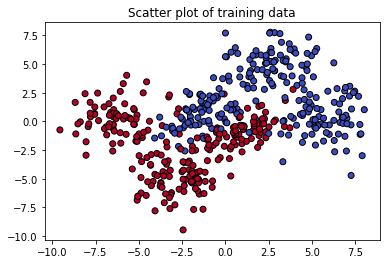

In [ ]:
plt.scatter(X_train[0],X_train[1],c=y_train[0],cmap=plt.cm.coolwarm,edgecolor='k')
plt.title("Scatter plot of training data")
plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [ ]:
classifiers5, alphas5 = train_AdaBoost(X_train,y_train,k=5)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
predict_AdaBoost(X_test,classifiers5,alphas5)

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.])

Use the plot_AdaBoost function to plot the learnt decision surface.

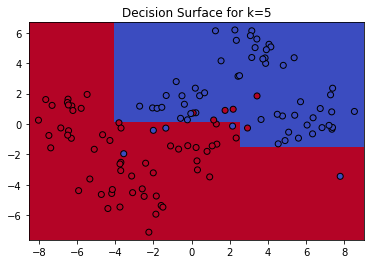

In [ ]:
plt.title("Decision Surface for k=5")
plot_AdaBoost(np.array(X_test),np.array(y_test),classifiers5,alphas5)

Compute the accuracy of the predictions on the test set.

In [ ]:
M = predict_AdaBoost(X_test,classifiers5,alphas5)
y_test = np.array(y_test).reshape(M.shape)

acc = 100 - (np.sum(np.abs(M-y_test)/2)/M.shape[0])*100
print("Accuracy of the predictions on the test set with k=5 is",acc)

Accuracy of the predictions on the test set with k=5 is 90.83333333333333


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [ ]:
classifiers100, alphas100 = train_AdaBoost(X_train,y_train,k=100)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
predict_AdaBoost(X_test,classifiers100,alphas100)

array([ 1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.])

Use the plot_AdaBoost function to plot the learnt decision surface.

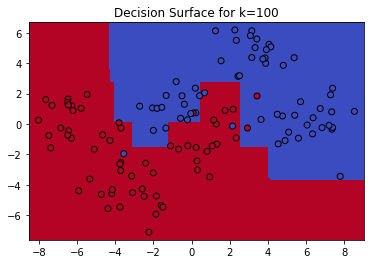

In [ ]:
plt.title("Decision Surface for k=100")
plot_AdaBoost(np.array(X_test),np.array(y_test),classifiers100,alphas100)

Compute the accuracy of the predictions on the test set.

In [ ]:
M = predict_AdaBoost(X_test,classifiers100,alphas100)
y_test = np.array(y_test).reshape(M.shape)

acc = 100 - (np.sum(np.abs(M-y_test)/2)/M.shape[0])*100
print("Accuracy of the predictions on the test set with k=100 is",acc)

Accuracy of the predictions on the test set with k=100 is 95.0
